# Następna cegiełka - optymalizacja.

In [ ]:
# optymalizacja funkcji za pomocą losowania

import numpy as np

def random_minimizer(f, lower_bound, upper_bound, num_samples=1000):
    """
    Minimalizuje funkcję f poprzez losowanie kolejnych punktów w zadanym przedziale.

    :param f: Funkcja skalarna do minimalizacji
    :param lower_bound: Dolna granica przedziału poszukiwań (może być skalarem lub tablicą dla wielowymiarowej funkcji)
    :param upper_bound: Górna granica przedziału poszukiwań (jak wyżej)
    :param num_samples: Liczba losowych próbek
    :return: Najlepszy znaleziony punkt i jego wartość funkcji
    """
    dimensions = np.array(lower_bound).shape  # Obsługuje zarówno 1D, jak i ND
    samples = np.random.uniform(lower_bound, upper_bound, size=(num_samples,) + dimensions)

    best_x = None
    best_f = float("inf")

    for x in samples:
        fx = f(x)
        if fx < best_f:
            best_f = fx
            best_x = x

    return best_x, best_f

# Przykładowa funkcja do minimalizacji
def example_function(x):
    return x**2 + 3*x + 2  # Funkcja kwadratowa

# Uruchomienie optymalizacji
best_x, best_f = random_minimizer(example_function, lower_bound=-10, upper_bound=10, num_samples=5000)
print(f"Najlepszy znaleziony punkt: {best_x}, wartość funkcji: {best_f}")


Najlepszy znaleziony punkt: -1.4980102686748236, wartość funkcji: -0.24999604096925365


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


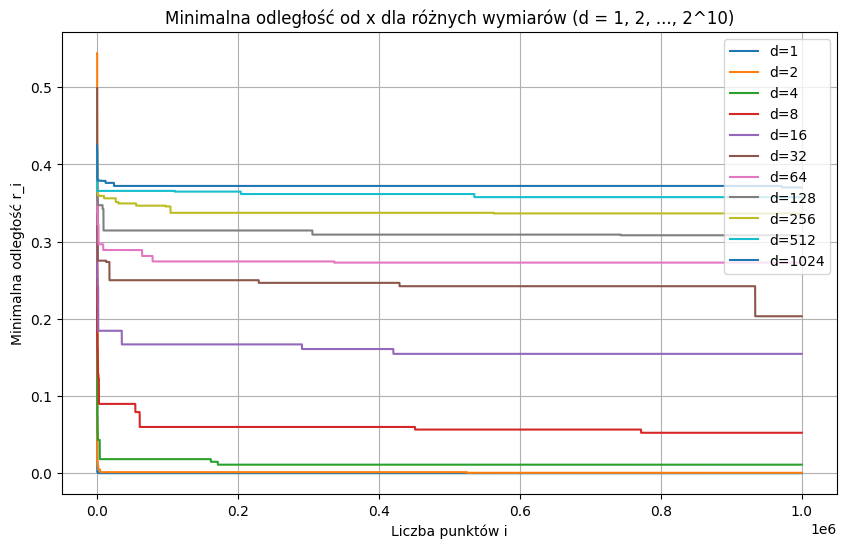

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def minimal_distances(d, n):
    """
    Funkcja losuje punkt x z [0,1]^d, następnie n punktów x_i i zwraca ciąg r_i,
    gdzie r_i to minimalna odległość x od {x_0, ..., x_i}.

    :param d: Liczba wymiarów
    :param n: Liczba losowanych punktów
    :return: Lista wartości r_i
    """
    x = np.random.uniform(0, 1, size=d)  # Losowy punkt x z [0,1]^d
    points = np.random.uniform(0, 1, size=(n, d))  # n losowych punktów x_i

    r_values = np.zeros(n)
    min_dist = float("inf")

    for i in range(n):
        dist = np.linalg.norm(x - points[i])
        min_dist=min(min_dist, dist)
        r_values[i]=min_dist

    return r_values


# rysuje normalizując jeszcze przez d^-0.5 by maksymalna odległość w kostce była 1
def plot_r_sequence_multiple_k(k, n):
    """
    Tworzy wykres wartości r_i w zależności od i dla d = 1, 2, ..., 2^k.

    :param k: Parametr określający maksymalną liczbę wymiarów jako 2^k.
    :param n: Liczba losowanych punktów.
    """
    plt.figure(figsize=(10, 6))

    for exponent in range(k + 1):
        d = 2 ** exponent
        r_sequence = minimal_distances(d, n)
        plt.plot(range(n), d**(-0.5)*r_sequence, linestyle='-', label=f'd={d}')

    plt.xlabel("Liczba punktów i")
    plt.ylabel("Minimalna odległość r_i")
    plt.title(f"Minimalna odległość od x dla różnych wymiarów (d = 1, 2, ..., 2^{k})")
    plt.legend()
    plt.grid()
    plt.show()

# Przykładowe użycie
k = 10  # Maksymalna liczba wymiarów to 2^k
n = 1000000  # Liczba punktów
plot_r_sequence_multiple_k(k, n)


Pochodna -- definicja dla funkcji jednowymiarowej

Pochodna -- definicja dla funkcji wielowymiarowej

Przykłady

## Funkcje skalarne

minimalizacja

# Gradient

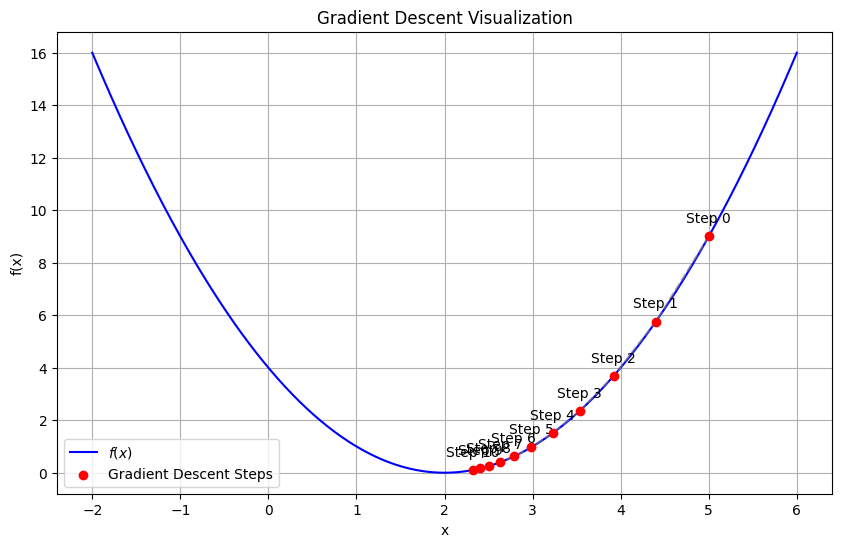

In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x):
    a, b, c = 1, -4, 4  # Coefficients of the quadratic function ax^2 + bx + c
    return a * x**2 + b * x + c

# Gradient of the function
gradient = grad(quadratic_function)

# Gradient descent function
def gradient_descent(f, grad_f, x0, step_size, num_steps):
    x_values = [x0]  # Store each step's x-value
    for _ in range(num_steps):
        x0 = x0 - step_size * grad_f(x0)
        x_values.append(x0)
    return x_values

# Visualization
def visualize_gradient_descent(f, grad_f, x0, step_size, num_steps):
    # Generate x values for plotting the function
    x = np.linspace(-2, 6, 400)
    y = f(x)

    # Perform gradient descent
    x_steps = gradient_descent(f, grad_f, x0, step_size, num_steps)
    y_steps = [f(x) for x in x_steps]

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$f(x)$", color="blue")
    plt.scatter(x_steps, y_steps, color="red", label="Gradient Descent Steps", zorder=5)
    plt.plot(x_steps, y_steps, linestyle="--", color="gray", alpha=0.6)

    # Annotate points
    for i, (xi, yi) in enumerate(zip(x_steps, y_steps)):
        plt.annotate(f"Step {i}", (xi, yi), textcoords="offset points", xytext=(0, 10), ha="center")

    plt.title("Gradient Descent Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
initial_x = 5.0  # Starting point
step_size = 0.1 # Step size for gradient descent
num_steps = 10   # Number of gradient descent steps

# Visualize
visualize_gradient_descent(quadratic_function, gradient, initial_x, step_size, num_steps)


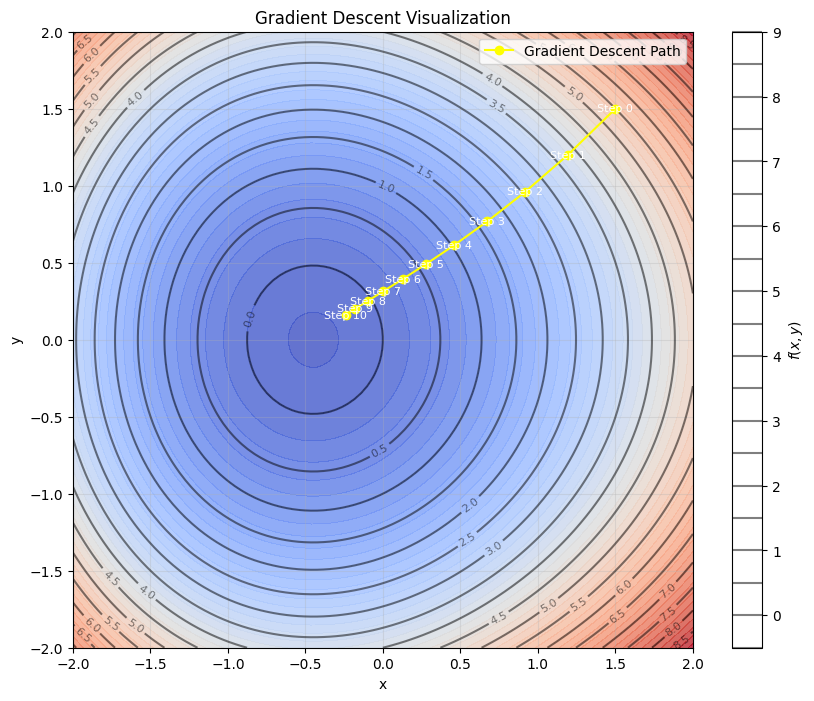

In [ ]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Define the 2D scalar function
def function_2d(xy):
    x, y = xy
    return x**2 + y**2 + np.sin(x) # A simple parabolic function

# Gradient of the function
gradient_2d = grad(function_2d)

# Gradient descent function
def gradient_descent_2d(f, grad_f, initial_xy, step_size, num_steps):
    xy_values = [initial_xy]  # Store each step's (x, y)
    xy = np.array(initial_xy)
    for _ in range(num_steps):
        grad_val = np.array(grad_f(xy))
        xy = xy - step_size * grad_val
        xy_values.append(xy)
    return xy_values

# Visualization
def visualize_gradient_descent_2d(f, grad_f, initial_xy, step_size, num_steps):
    # Create a grid of points for plotting
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

    # Perform gradient descent
    xy_steps = gradient_descent_2d(f, grad_f, initial_xy, step_size, num_steps)
    x_steps, y_steps = zip(*xy_steps)
    z_steps = [f([x, y]) for x, y in xy_steps]

    # Plot heatmap and contour lines
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap="coolwarm", alpha=0.8)  # Heatmap
    contour_lines = plt.contour(X, Y, Z, levels=20, colors="black", alpha=0.5)
    plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.1f")

    # Plot gradient descent steps
    plt.plot(x_steps, y_steps, marker="o", color="yellow", label="Gradient Descent Path", zorder=5)
    for i, (xi, yi) in enumerate(zip(x_steps, y_steps)):
        plt.text(xi, yi, f"Step {i}", fontsize=8, color="white", zorder=10, ha="center", va="center")

    # Customize plot
    plt.colorbar(label=r"$f(x, y)$")
    plt.title("Gradient Descent Visualization")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Parameters
initial_xy = [1.5, 1.5]  # Starting point
step_size = 0.1          # Step size for gradient descent
num_steps = 10           # Number of gradient descent steps

# Visualize
visualize_gradient_descent_2d(function_2d, gradient_2d, initial_xy, step_size, num_steps)
